In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plot_utils import plot_temperature_ensemble, plot_emission_ensemble, plot_schematic

## 1. Load data

In [2]:
results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/raw/results.pkl"
scenario_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/raw/scenarios.pkl"

results = pickle.load(open(results_path, "rb"))
scenarios = pickle.load(open(scenario_path, "rb"))
baseline_result = pd.read_csv("SSP4-25-results.csv", index_col="Unnamed: 0")

## 2. Plot the temperature curves

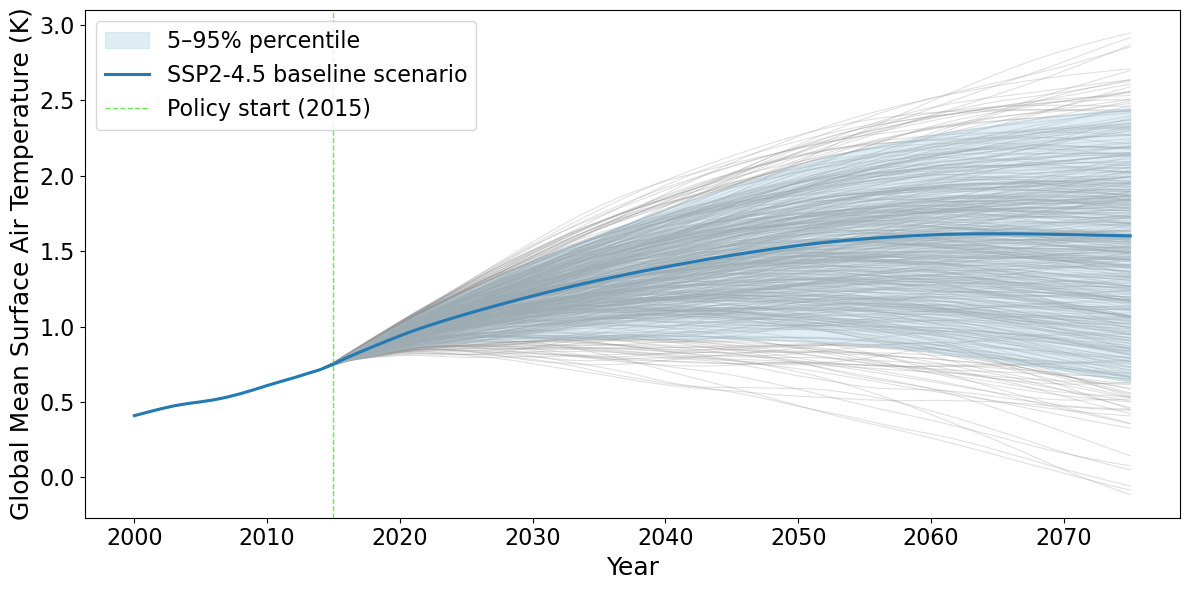

In [4]:
plot_temperature_ensemble(results, baseline_result, start_year=2000, n_sample=500, save_name="temperature_ensemble_new.pdf", random_seed=0)

## 3. Plot the emission policies

In [ ]:
import sys
import os
sys.path.insert(0,os.path.join(os.getcwd(), '../ciceroscm/', 'src'))

from ciceroscm import CICEROSCM
from ciceroscm.parallel.cscmparwrapper import run_ciceroscm_parallel
import ciceroscm.input_handler as input_handler

test_data_dir = "/home/obola/repositories/cicero-scm-surrogate/ciceroscm/tests/test-data"
em_data_start = 1900
em_data_policy = 2015
em_data_end = 2075

ih = input_handler.InputHandler({"nyend": em_data_end, "nystart": em_data_start, "emstart": em_data_policy})
em_data = ih.read_emissions(os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"))

/home/obola/repositories/cicero-scm-surrogate/notebooks/../ciceroscm/src/ciceroscm/parallel/_parallel_process.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


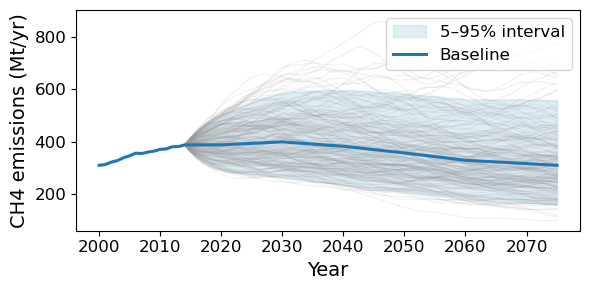

In [6]:
plot_emission_ensemble(em_data, scenarios, gas="CH4", n_sample=200, save_name="CH4_ensemble_new.pdf")

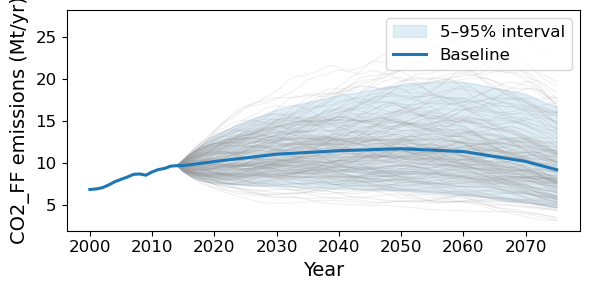

In [7]:
plot_emission_ensemble(em_data, scenarios, gas="CO2_FF", n_sample=200, save_name="CO2_FF_ensemble_new.pdf")

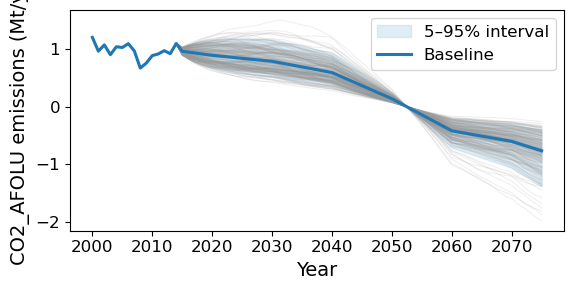

In [8]:
plot_emission_ensemble(em_data, scenarios, gas="CO2_AFOLU", n_sample=200, save_name="CO2_AFOLU_ensemble_new.pdf")

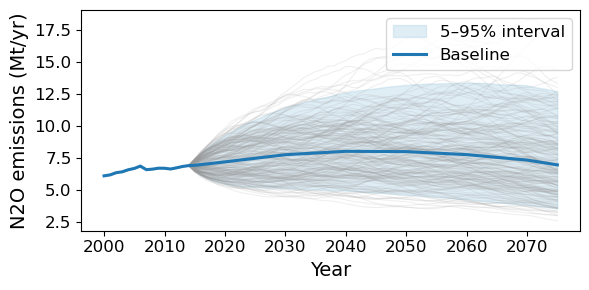

In [9]:
plot_emission_ensemble(em_data, scenarios, gas="N2O", n_sample=200, save_name="N2O_ensemble_new.pdf")

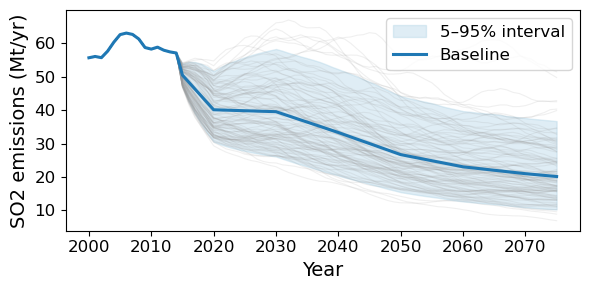

In [10]:
plot_emission_ensemble(em_data, scenarios, gas="SO2", n_sample=100, save_name="SO2_ensemble_new.pdf")

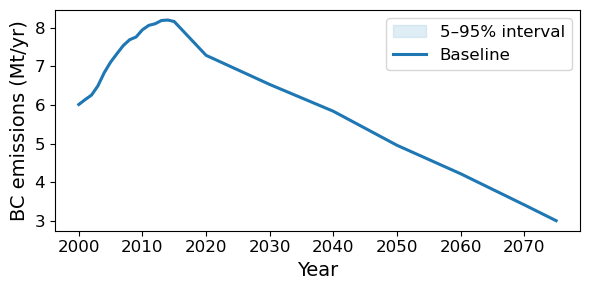

In [11]:
plot_emission_ensemble(em_data, scenarios, gas="BC",    n_sample=100, save_name="BC_ensemble_new.pdf")

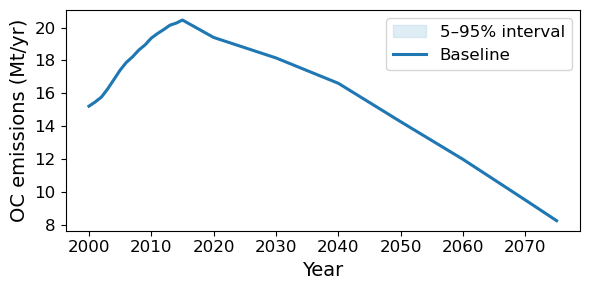

In [11]:
plot_emission_ensemble(em_data, scenarios, gas="OC",    n_sample=100, save_name="OC_ensemble_new.pdf")

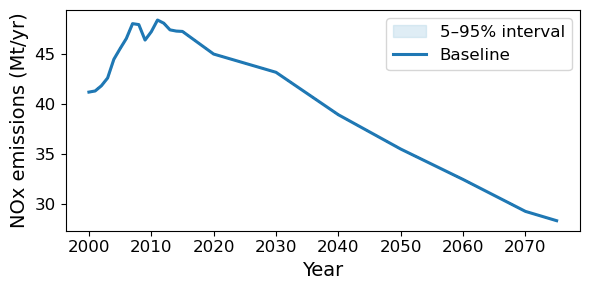

In [12]:
plot_emission_ensemble(em_data, scenarios, gas="NOx",   n_sample=100, save_name="NOx_ensemble_new.pdf")


## 4. Surrogate model training data format

In [15]:
path_x = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/processed/X_train.npy"
path_y = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/processed/y_train.npy"

X = np.load(path_x)
y = np.load(path_y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (854000, 66, 5)
y shape: (854000,)


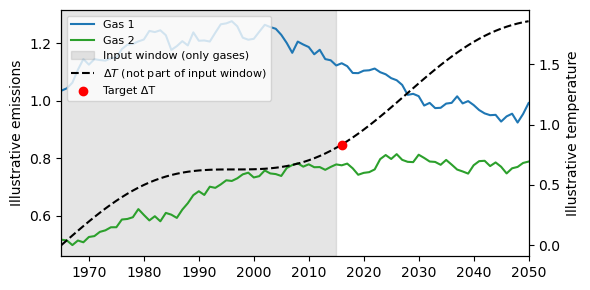

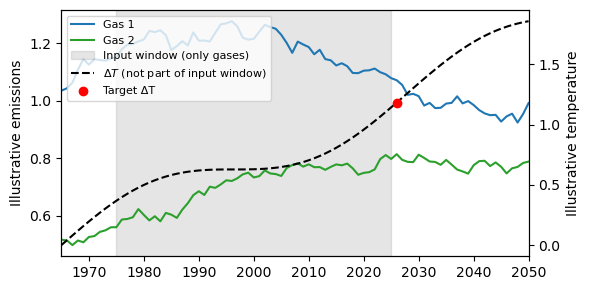

In [16]:
# Save updated versions
plot_schematic(2015, "plots/schematic_window_2015.pdf")
plot_schematic(2025, "plots/schematic_window_2025.pdf")